In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/Cha cha
 [INFO] : 
 |  path ignored: name `Cha cha` in IGNORE_DIRS
path ignored: ../datasets/drum_midi/Cha cha 

path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM
  05 8th Hat.mid
  03 8th Ride.mid
  04 8th Perc.mid
  06 8th Perc.mid
  02 8th Hat.mid
  07 8th Perc.mid
  01 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM
  06 8th hat.mid
  02 8th Ride.mid
  05 8th Ride.mid
  03 8th Ride.mid
  07 8th Toms.mid
  04 8th Perc.mid
  01 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  06 8th Toms.mid
  05 8th Snare.mid
  04 8th Ride.mid
  07 8th Toms.mid
  02 8th Snare.mid
  01 8th Hat.mid
  03 4th Snare .mid
path ../datasets/drum_

path ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Beat 007 Tom (130 BPM)
 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Beat 007 Tom (130 BPM) 

path ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Song 004 (124 BPM)
 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Song 004 (124 BPM) 

path ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Beat 003 Hihat (88 BPM)
 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Beat 003 Hihat (88 BPM) 

path ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Beat 019 Open HH (080 BPM)
 [INFO] : 
 |  path ignored: name `Midi.Styles.Percussion` in IGNORE_DIRS
path ignored: ../datasets/drum_midi/Midi.Styles.Percussion/XLN/Loud Beat 019 Open HH (080 BPM) 

pa


Encoding midi-data
 1000
> -> multi-track = True none
 [INFO] : 
 |  True
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is not 96 but [15360]
 [INFO] : 
 |  PPQ is n

In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/05 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/03 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/04 8th Perc.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/06 8th Perc.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/02 8th Hat.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/07 8th Perc.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/01 8th Hat.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/06 8th hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/05 Straight Line 136BPM/02 8th Ride.mid"),
 (9,
  "../datasets/drum_midi/5

In [8]:
genres[0][-2:]

["01 Rock'n'Roll", '06 Moonglow 140BPM']

In [9]:
unique_genres = set(genre[-1] for genre in genres)
len(unique_genres)

108

In [10]:
x_train.shape

(1000, 160, 10, 1)

In [11]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [12]:
x_test = x_train[m:]
x_train = x_train[:m]

In [13]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [14]:
# i = 0
# j = 399
# plot.single(x_train[i, :50,:,0])
# plot.single(x_train[j, :50,:,0])
# # plot.single(x_train[2a, :50,:,0])
# np.array(labels)[[i,j]]

In [15]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [16]:
latent_dim = 10
epsilon_std = 1.0

In [17]:
encoder_model, encoder_input, z_mean, z_log_var = models.encoder(input_shape, latent_dim)
# encoder_model.summary()

In [18]:
sample_ = lambda args: models.sample(args, z_mean, z_log_var, latent_dim, epsilon_std)

In [19]:
# z = Lambda(sampling)([z_mean, z_log_var])
z_input = encoder_model(encoder_input)
z_output = Lambda(sample_)(z_input)

In [20]:
decoders = models.list_decoders(input_shape)
decoded = utils.composition(decoders, z_output, verbose=False)

In [21]:
# instantiate VAE model
vae_input = encoder_input
vae_output = decoded
vae = Model(vae_input, vae_output)
# vae.summary()

In [22]:
# vae.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [23]:
vae_loss = models.vae_loss(vae_input, vae_output, z_mean, z_log_var, timesteps, notes, beta=0.75, gamma=0.05)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
# vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Output "reshape_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_2" during training.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
batch_size = 128
epochs = 500
params = {'batch_size': batch_size, 'return_y': False}

In [25]:
# phase_mod = 0.01
# whitening = False

In [26]:
# m = 1000
# useDataGenerator = False
# # useDataGenerator = True
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

# x = x_train[:m]
# # x = x_train
# # i = [0,1, 7,8, 14,15, 399,400]
# # x = x_train[i]
# # x = np.concatenate([x for _ in range(10)])
# print('x:', x.shape)

# print('batch_size: %i' % batch_size)
# print('update-iterations:', round(epochs * x.shape[0] / batch_size))
# if useDataGenerator:
#     datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
#     history = collections.defaultdict(list)
#     n_batches = datagen.__len__()
#     for e in range(epochs):
#         print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
#         for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
#             print(' Batch %i/%i' % (batch_i,n_batches))
#             x_ = x_batch
#             # x_ = datagen.shuffle_3rd_dim(x_)
#             # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
#             h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
#             for k,v in h.history.items(): 
#                 print(' \\_%s' % k, [round(v_,) for v_ in v])
#                 history[k].append(v)
#             if batch_i >= n_batches:
#                 break
# else:
#     h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
#     history = h.history

In [27]:
fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'

In [28]:
# io.save_dict('../logs/','train_loss', history)

In [29]:
# # for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
# #     model.save_weights(dn + prefix + suffix + '.h5', "w")
# vae.save_weights(fn, "w")

In [30]:
vae.load_weights(fn)

In [31]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


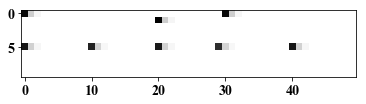

m (50, 10, 1)


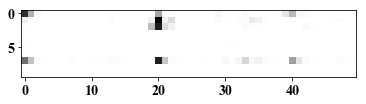

m (50, 10, 1)


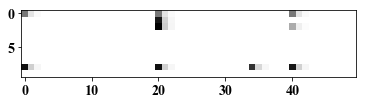

m (50, 10, 1)


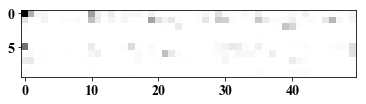

In [32]:
i,j = 0, 10
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [33]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [34]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [35]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [36]:
# build a model to project inputs on the latent space
encoder = Model(encoder_input, z_mean)

In [37]:
generator_input = Input((latent_dim,))
generator_layers_ = utils.composition(decoders, generator_input)
generator = Model(generator_input, generator_layers_)

In [38]:
decoder = generator

## Style transfer

In [39]:
import sklearn.feature_selection
import sklearn.ensemble

In [40]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [41]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [42]:
import transformation_extraction

In [43]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt=5, v=1)


 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 9, importance: 0.217180
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 9, importance: 0.291708
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 5, importance: 0.132355
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 2, importance: 0.296868

 Genre A: 01 Rock'n'Roll/05 Straight Line 136BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 9, importance: 0.213275
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 3, importance: 0.276624
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 8, importance: 0.172972
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 5, importance: 0.257411

 Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 9, importance: 0.273153
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 3, importance: 0.298971
  genre B: 	01

In [44]:
print('avg importance: %f' % np.mean(importances))

avg importance: 0.229791


In [45]:
# list(min_transformations.items())[0]

In [46]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  


Genre `01 Rock'n'Roll/06 Moonglow 140BPM` to: 
 dim:	genre:
 9 	01 Rock'n'Roll/05 Straight Line 136BPM
 9 	01 Rock'n'Roll/02 Gogo 191BPM
 0 	01 Rock'n'Roll/07 Thwag 170BPM
 2 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/05 Straight Line 136BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 0 	01 Rock'n'Roll/02 Gogo 191BPM
 0 	01 Rock'n'Roll/07 Thwag 170BPM
 5 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/02 Gogo 191BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 3 	01 Rock'n'Roll/05 Straight Line 136BPM
 0 	01 Rock'n'Roll/07 Thwag 170BPM
 0 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/07 Thwag 170BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 0 	01 Rock'n'Roll/05 Straight Line 136BPM
 1 	01 Rock'n'Roll/02 Gogo 191BPM
 1 	01 Rock'n'Roll/04 Maybelline 233BPM

Genre `01 Rock'n'Roll/04 Maybelline 233BPM` to: 
 dim:	genre:
 0 	01 Rock'n'Roll/06 Moonglow 140BPM
 0 	01 Rock'n'Roll/05 Straight Line 136BPM
 9 	

(array([4., 2., 2., 1., 0., 4., 0., 0., 1., 6.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

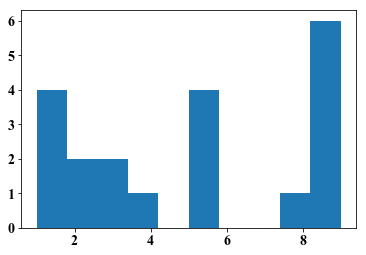

In [47]:
plt.hist(best_dims)

In [48]:
# TODO save as python object (or json)

In [61]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

fn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)

'../results/min_transformations.pkl'

In [62]:
t_ = io.load(fn)

In [63]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [64]:
list(transformations.keys())[:3]

["01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM"]

In [65]:
len(transformations.keys())

5